# **Heart Disease Prediction Model**



[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## Step 1: Import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import pickle

#for model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

## Step 2: Load the dataset

In [2]:
df = pd.read_csv(r'/workspaces/Heart-Disease-Prediction-Model/data/heart.csv')

## Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [3]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Chol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)
row, col = df.shape

print('Number of Rows :', row)
print('Number of Columns :', col)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Chol            918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Shape of the data
(918, 12)
Number of Rows : 918
Number of Columns : 12


## Step 4: Statistical Insights

Obtain the mean, standard deviation, etc. from the data

In [6]:
df.describe()

,Age,RestingBP,Chol,FastingBS,MaxHR,Oldpeak,Target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df['Target'].value_counts()

1    508
0    410
Name: Target, dtype: int64

Here, 1 represents a Defective Heart and 0 represents a Healthy Heart.

## Step 5: Data Cleaning

Handling outliers, duplicates and missing values

### Missing Values

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Chol              0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

### Duplicate Values

In [9]:
df.duplicated().sum()

0

### Outliers

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

##### Age

<Axes: xlabel='Age'>

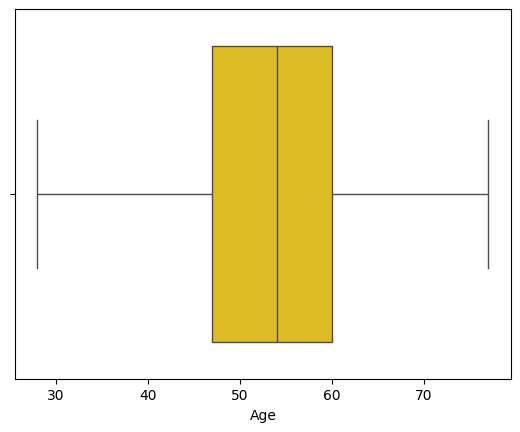

In [10]:
sns.boxplot(x = 'Age', data=df, color='#fbcf04')

##### Resting Blood Pressure

<Axes: xlabel='RestingBP'>

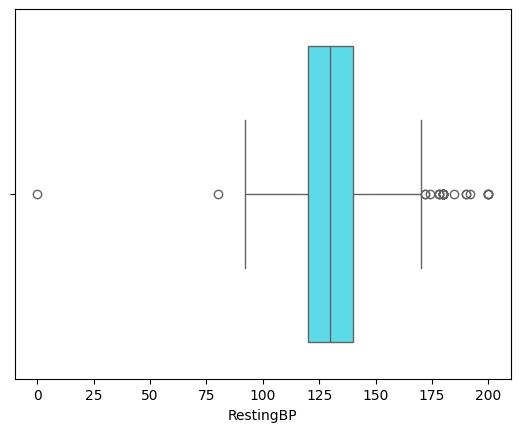

In [11]:
sns.boxplot(x = 'RestingBP', data=df, color='#47EEFF')

The outliers above are problematic. To have a Resting Blood Pressure of below 100 and above 175 is practically impossible, hence we will be removing them.

In [12]:
df = df[df['RestingBP']>=75]
df = df[df['RestingBP']<=175]

In [13]:
df.shape

(894, 12)

##### Cholesterol

<Axes: xlabel='Chol'>

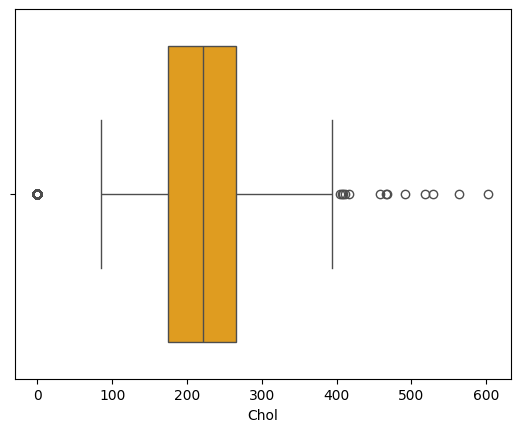

In [14]:
sns.boxplot(x = 'Chol', data=df, color='orange')

##### Maximum Heart Rate

<Axes: xlabel='MaxHR'>

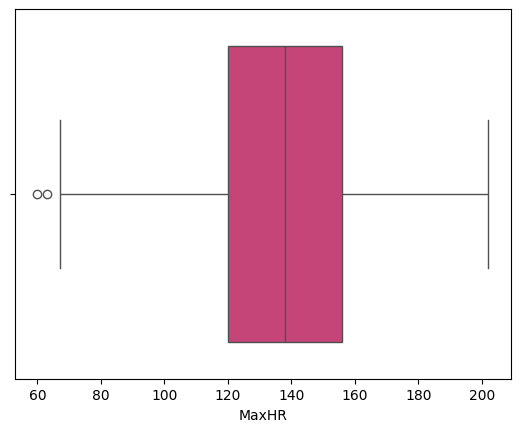

In [15]:
sns.boxplot(x = 'MaxHR', data=df, color='#da3074')

##### OldPeak

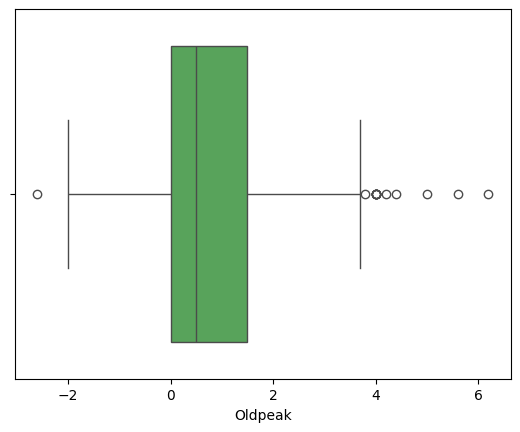

In [16]:
sns.boxplot(x = 'Oldpeak', data=df, color='#4CAF50')
plt.show()

## Step 6: Data Visualisation

### Correlation

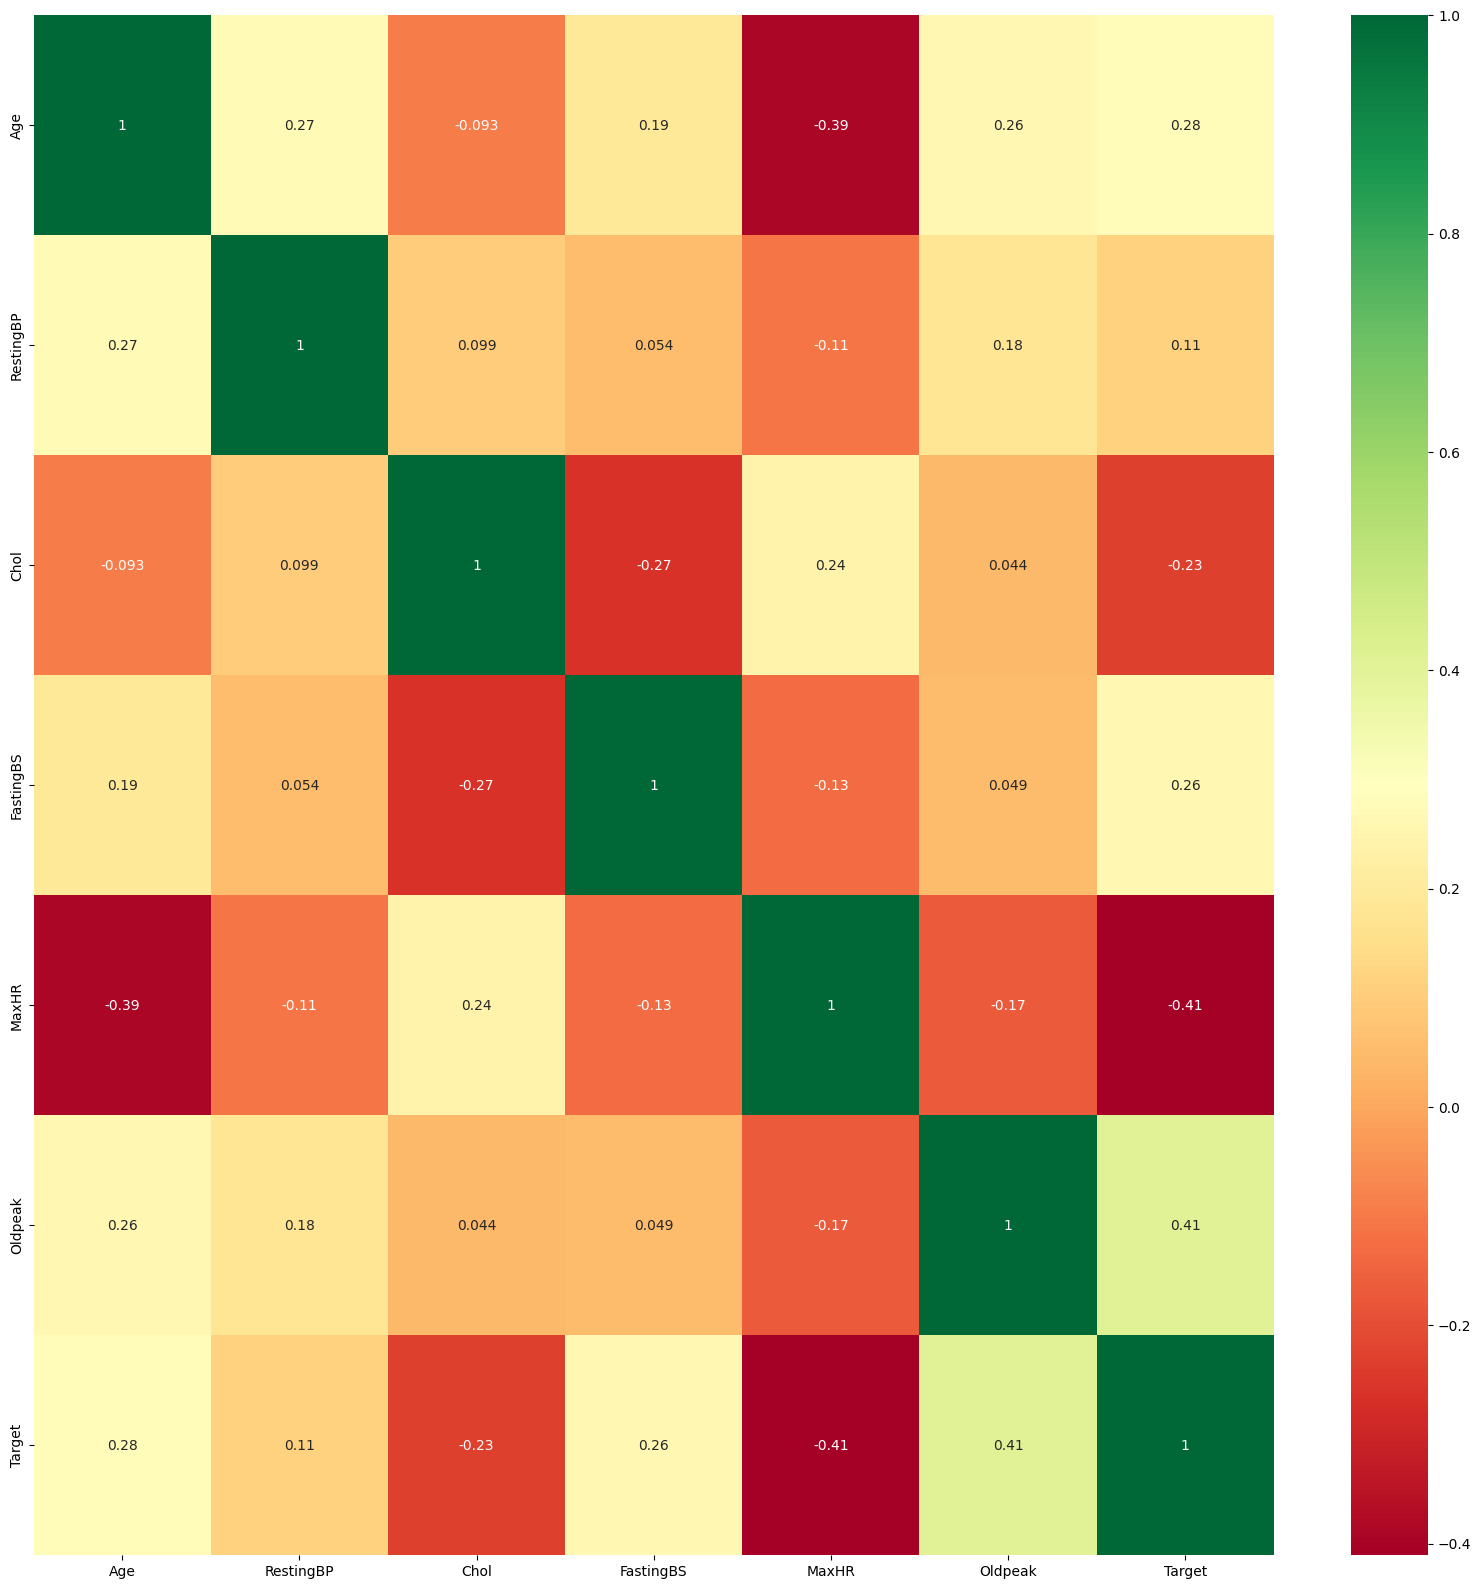

In [17]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Age

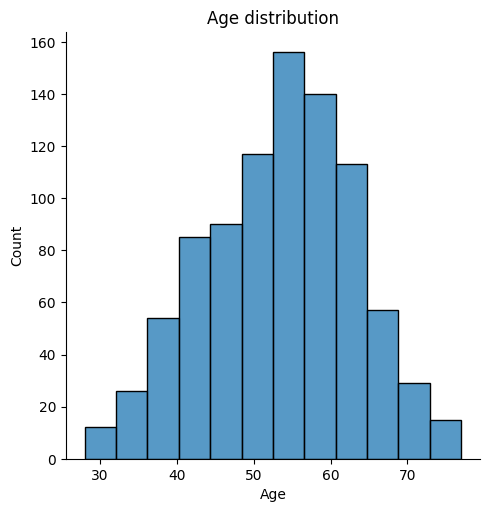

In [18]:
sns.displot(df['Age'], bins=12)
plt.title('Age distribution')
plt.show()

From the above graph, we can deduce that most patients lie between the ages of 50 and 60 years.

### Sex

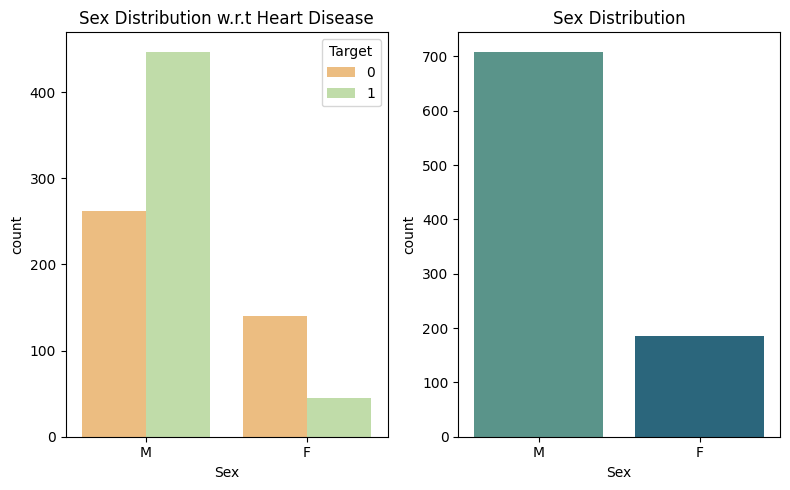

In [19]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Sex', data=df, palette='Spectral',hue='Target')
plt.title('Sex Distribution w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Sex', data=df, palette='crest')
plt.title('Sex Distribution')

plt.tight_layout()

Our dataset consists of mostly male candidates(nearly 700). Out of which, over 400 males have heart disease.

### Chest Pain Type

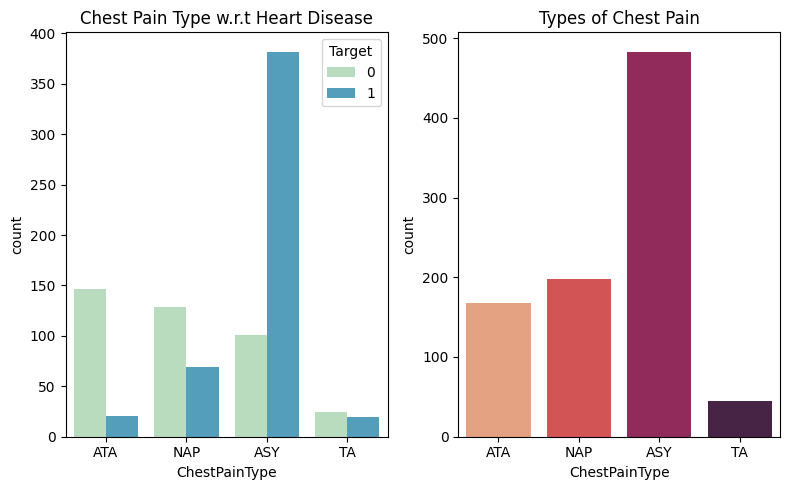

In [20]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x ='ChestPainType',hue='Target', data=df, palette='GnBu')
plt.title('Chest Pain Type w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x ='ChestPainType',data=df, palette='rocket_r')
plt.title('Types of Chest Pain')

plt.tight_layout()


There are 4 types of Chest Pain : 
* ATA - Atypical Angina
* NAP - Non-Anginal Pain
* ASY - Asymptomatic
* TA - Typical Angina

From the above graphs, we can infer that ASY(Asymptomatic chest pain) is the primary form of chest pain experienced by individuals with heart disease.

### Resting Blood Pressure

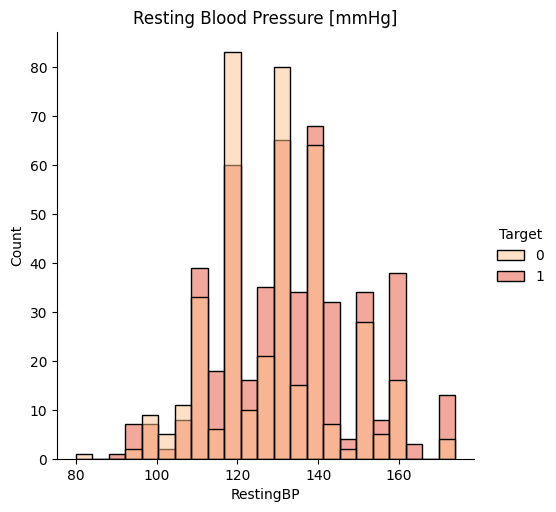

In [21]:
sns.displot(x = 'RestingBP', data=df, hue='Target', palette='OrRd')
plt.title('Resting Blood Pressure [mmHg]')
plt.show()

The resting blood pressure of many individuals lies between 120 and 140.

### RestingECG

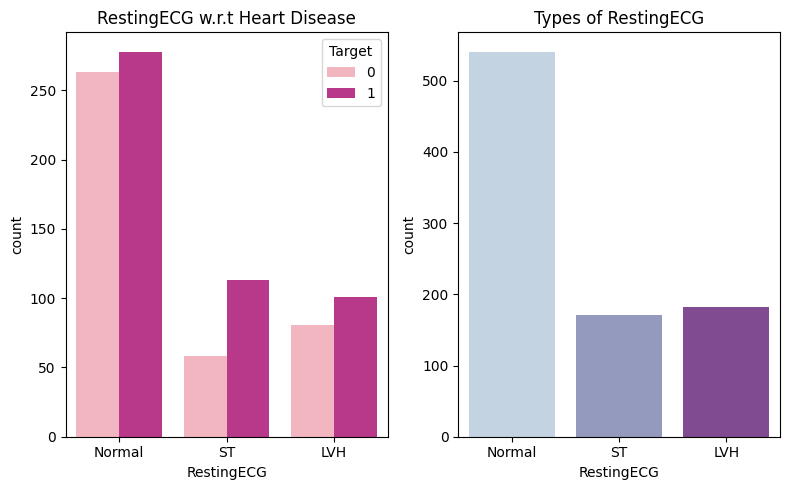

In [22]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'RestingECG', hue='Target',data=df,palette='RdPu')
plt.title('RestingECG w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'RestingECG', data=df,palette='BuPu')
plt.title('Types of RestingECG')

plt.tight_layout()


There are 3 types of Resting Electrocardiogram Results:
- Normal: Normal
- ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

Most of the individuals have Normal RestingECG results, and most of them with this result have heart disease.

### Cholesterol

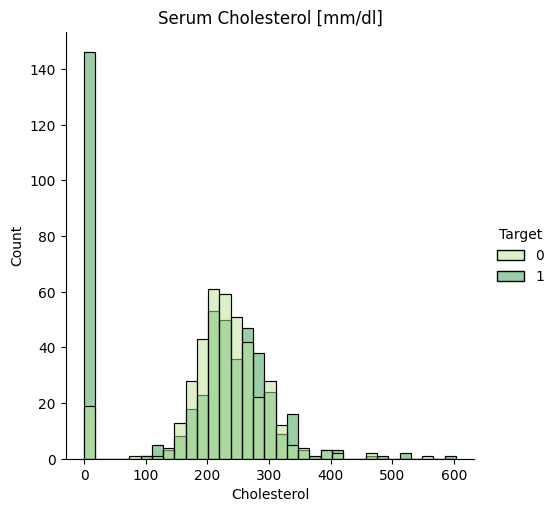

In [23]:
sns.displot(x = 'Chol', data=df, hue='Target', palette='YlGn')
plt.xlabel('Cholesterol')
plt.title('Serum Cholesterol [mm/dl]')
plt.show()

Most individuals have 0 mm/dl serum cholesterol.

### Fasting Blood Sugar

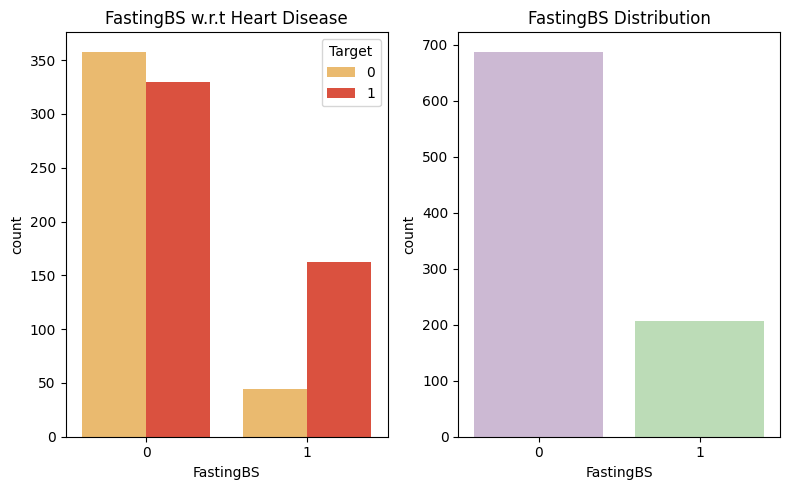

In [24]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'FastingBS', hue='Target',data=df,palette='YlOrRd')
plt.title('FastingBS w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'FastingBS',data=df,palette='PRGn')
plt.title('FastingBS Distribution')

plt.tight_layout()

FastingBS (Fasting Blood Sugar) has been divided into 2 classes:
- 1: FastingBS > 120 mg/dl
- 0: FastingBS <= 120 mg/dl

Most of the individuals in this dataset have a FastingBS of less than 120 mg/dl. From the graphs above, we can see that those with heart disease are more likely to have a FastingBS of greater than 120 mg/dl.

### Maximum Heart Rate

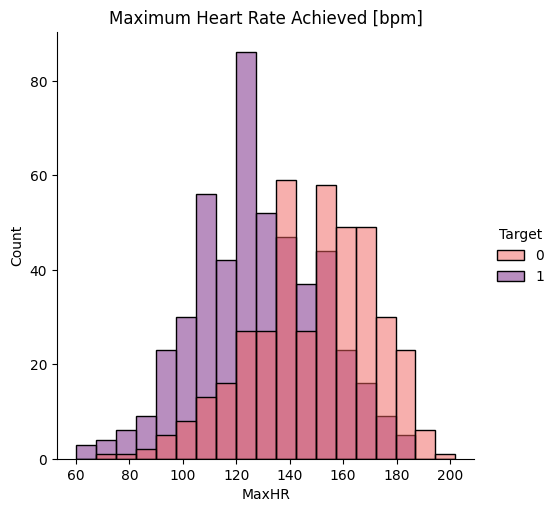

In [25]:
sns.displot(x = 'MaxHR', hue='Target',data=df,palette='magma_r')
plt.title('Maximum Heart Rate Achieved [bpm]')
plt.show()

The Maximum Heart Rate achieved lies between 60 and 202, and most individuals have achieved a maximum heart rate that lies between 120 and 140.

### Exercise Induced Angina

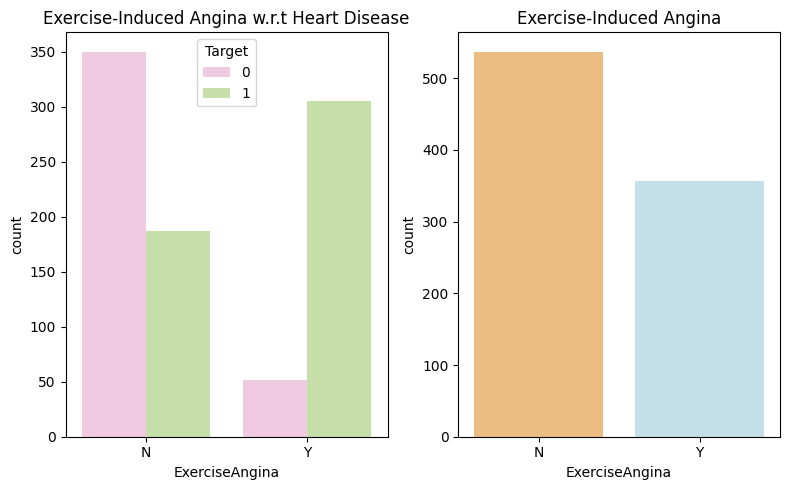

In [26]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'ExerciseAngina', hue='Target',data=df,palette='PiYG')
plt.title('Exercise-Induced Angina w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'ExerciseAngina', data=df,palette='RdYlBu')
plt.title('Exercise-Induced Angina')

plt.tight_layout()

ExerciseAngina (Exercise-Induced Angina) is divided into 2 classes :
- N: No
- Y: Yes

This dataset contains more people with no exercise-induced angina.
From the above graphs we can infer that most individuals with Heart Disease tend to have exercise-induced angina.

### OldPeak

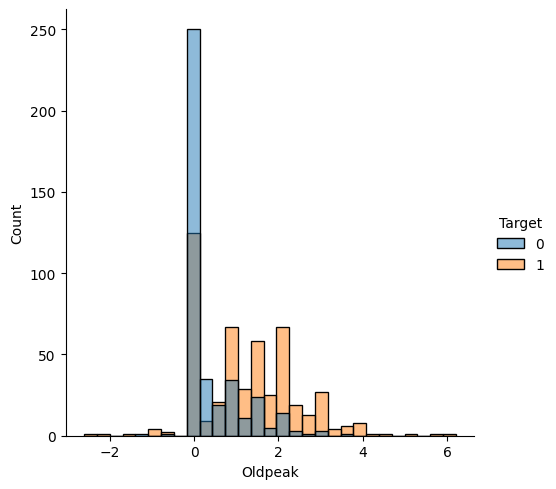

In [27]:
sns.displot(x = 'Oldpeak', data=df, hue='Target')
plt.show()

Oldpeak is the ST depression induced by exercise relative to rest where, 'ST' relates to positions on the ECG plot.

### ST Slope

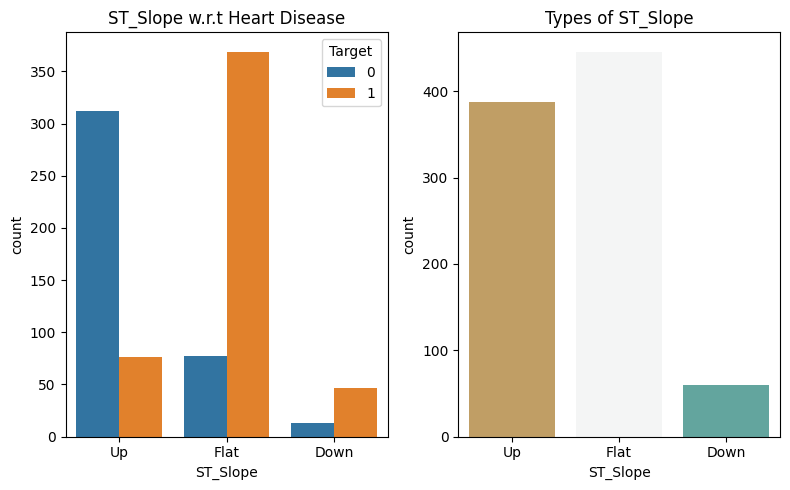

In [28]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'ST_Slope', data=df, hue='Target')
plt.title('ST_Slope w.r.t Heart Disease')

plt.subplot(1, 2, 2)
sns.countplot(x = 'ST_Slope', data=df,palette='BrBG')
plt.title('Types of ST_Slope')

plt.tight_layout()

### Target

<Axes: xlabel='Target', ylabel='count'>

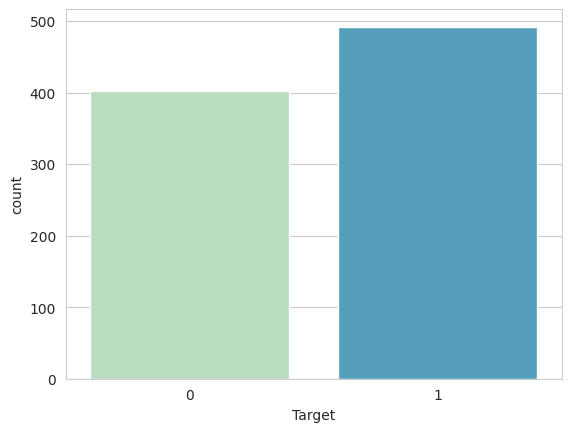

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df,palette='GnBu')

## Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best

### Encoding Text Data

In [30]:
df = pd.get_dummies(df,columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [31]:
df.head()

,Age,RestingBP,Chol,FastingBS,MaxHR,Oldpeak,Target,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Scaling the features

In [32]:
X= df.drop(['Target'],axis=1)
Y= df['Target']

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the Dataset

In [34]:
X_train_scaled , X_test_scaled, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=48)

##### K-NEAREST NEIGHBOUR(KNN) ALGORITHM

In [35]:
knn_scores = []

for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_scaled, Y, cv=10)
    knn_scores.append(score.mean())

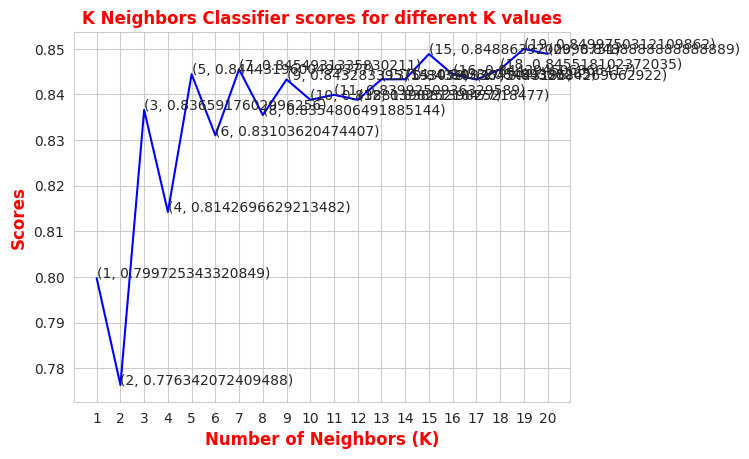

In [36]:
import matplotlib.pyplot as plt
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values',color='Red',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(X_train_scaled,Y_train)
Y_pred_knn = knn_classifier.predict(X_test_scaled)

In [38]:
scoreknn=cross_val_score(knn_classifier,X_scaled,Y,cv=10)
scoreknn.mean()

0.8388139825218477

##### RANDOM FOREST CLASSIFIER

In [39]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X_train_scaled,Y_train)
Y_pred_rfc = randomforest_classifier.predict(X_test_scaled)

In [40]:
scorerfc = cross_val_score(randomforest_classifier,X_scaled,Y,cv=10)
scorerfc.mean()

0.8331960049937578

##### LOGISTIC REGRESSION

In [41]:
logre = LogisticRegression(solver='liblinear')
logre.fit(X_train_scaled,Y_train)
Y_pred_lr = logre.predict(X_test_scaled)

In [42]:
scorelr = cross_val_score(logre,X_scaled,Y,cv=10)
scorelr.mean()

0.8477278401997502

##### SUPPORT VECTOR MACHINES(SVM) ALGORITHM

In [43]:
svm = SVC()
svm.fit(X_train_scaled,Y_train)
Y_pred_svm = svm.predict(X_test_scaled)

In [44]:
scoresvm = cross_val_score(svm,X_scaled,Y,cv=10)
scoresvm.mean()

0.8487890137328341

##### NAIVE BAYES CLASSFIER

In [45]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,Y_train)
Y_pred_gnb = gnb.predict(X_test_scaled)

In [46]:
scoregnb = cross_val_score(gnb,X_scaled,Y,cv=10)
scoregnb.mean()

0.8521972534332084

##### DECISION TREE CLASSFIER

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,Y_train)
Y_pred_dtc = dtc.predict(X_test_scaled)

In [48]:
scoredtc = cross_val_score(dtc,X_scaled,Y,cv=10)
scoredtc.mean()

0.7784893882646691

##### ENSEMBLE LEARNING

**BAGGING**

It uses one base model. Here, we are using Decision Tree Classifier.

In [49]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train_scaled, Y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = Y_test, y_pred = clf.predict(X_test_scaled)))

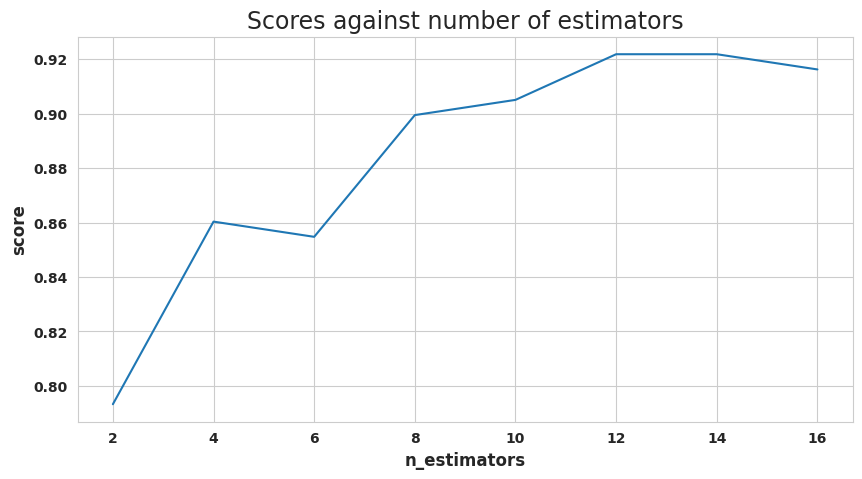

In [50]:

# Generate the plot of scores against number of estimators
plt.figure(figsize=(10,5))
plt.plot(estimator_range, scores)
plt.xlabel("n_estimators", fontsize = 12)
plt.ylabel("score", fontsize = 12)
plt.title('Scores against number of estimators', fontsize=17)

plt.show()

In [51]:
bag = BaggingClassifier(base_estimator=dtc)
bag.fit(X_train_scaled,Y_train)
Y_pred_bag = bag.predict(X_test_scaled)

In [52]:
scorebag = cross_val_score(bag,X_scaled,Y,cv=10)
scorebag.mean()

0.8241448189762796

**BOOSTING**

*Ada Boosting (Adaptive Boosting)*: AdaBoost assigns different weights to data points and focuses on the mistakes made by the previous base model. It increases the importance of misclassified samples in each iteration, effectively giving more weight to difficult-to-classify data points.

In [53]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc.fit(X_train_scaled, Y_train)
Y_pred_abc = abc.predict(X_test_scaled)

In [54]:
scoreabc = cross_val_score(abc,X_scaled,Y,cv=10)
scoreabc.mean()

0.8443196004993758

*Gradient Boosting*: Gradient Boosting builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous one. The process involves optimizing a loss function using gradient descent. Common implementations of gradient boosting include XGBoost, LightGBM, and CatBoost.

*XGBoost (Extreme Gradient Boosting)*: XGBoost is a highly optimized and scalable gradient boosting framework. It incorporates techniques like regularization, parallel processing, and tree pruning to improve model performance.

In [55]:
xgbc=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgbc.fit(X_train_scaled, Y_train)
Y_pred_xgbc = xgbc.predict(X_test_scaled)

In [56]:
scorexgbc = cross_val_score(xgbc,X_scaled,Y,cv=10)
scorexgbc.mean()

0.8364419475655431

**MAX VOTING**

In [57]:
mv = VotingClassifier(estimators=[('lr', logre),('gnb', gnb),('svm', svm),('randomforest', randomforest_classifier),('knn', knn_classifier),('dtc', dtc),('xgbc', xgbc),('abc', abc),('bag', bag)], voting='hard')
mv.fit(X_train_scaled,Y_train)
Y_pred_mv = mv.predict(X_test_scaled)

In [58]:
scoremv = cross_val_score(mv,X_scaled,Y,cv=10)
scoremv.mean()

0.8566916354556803

## Step 9: Model Evaluation

### CONFUSION MATRIX

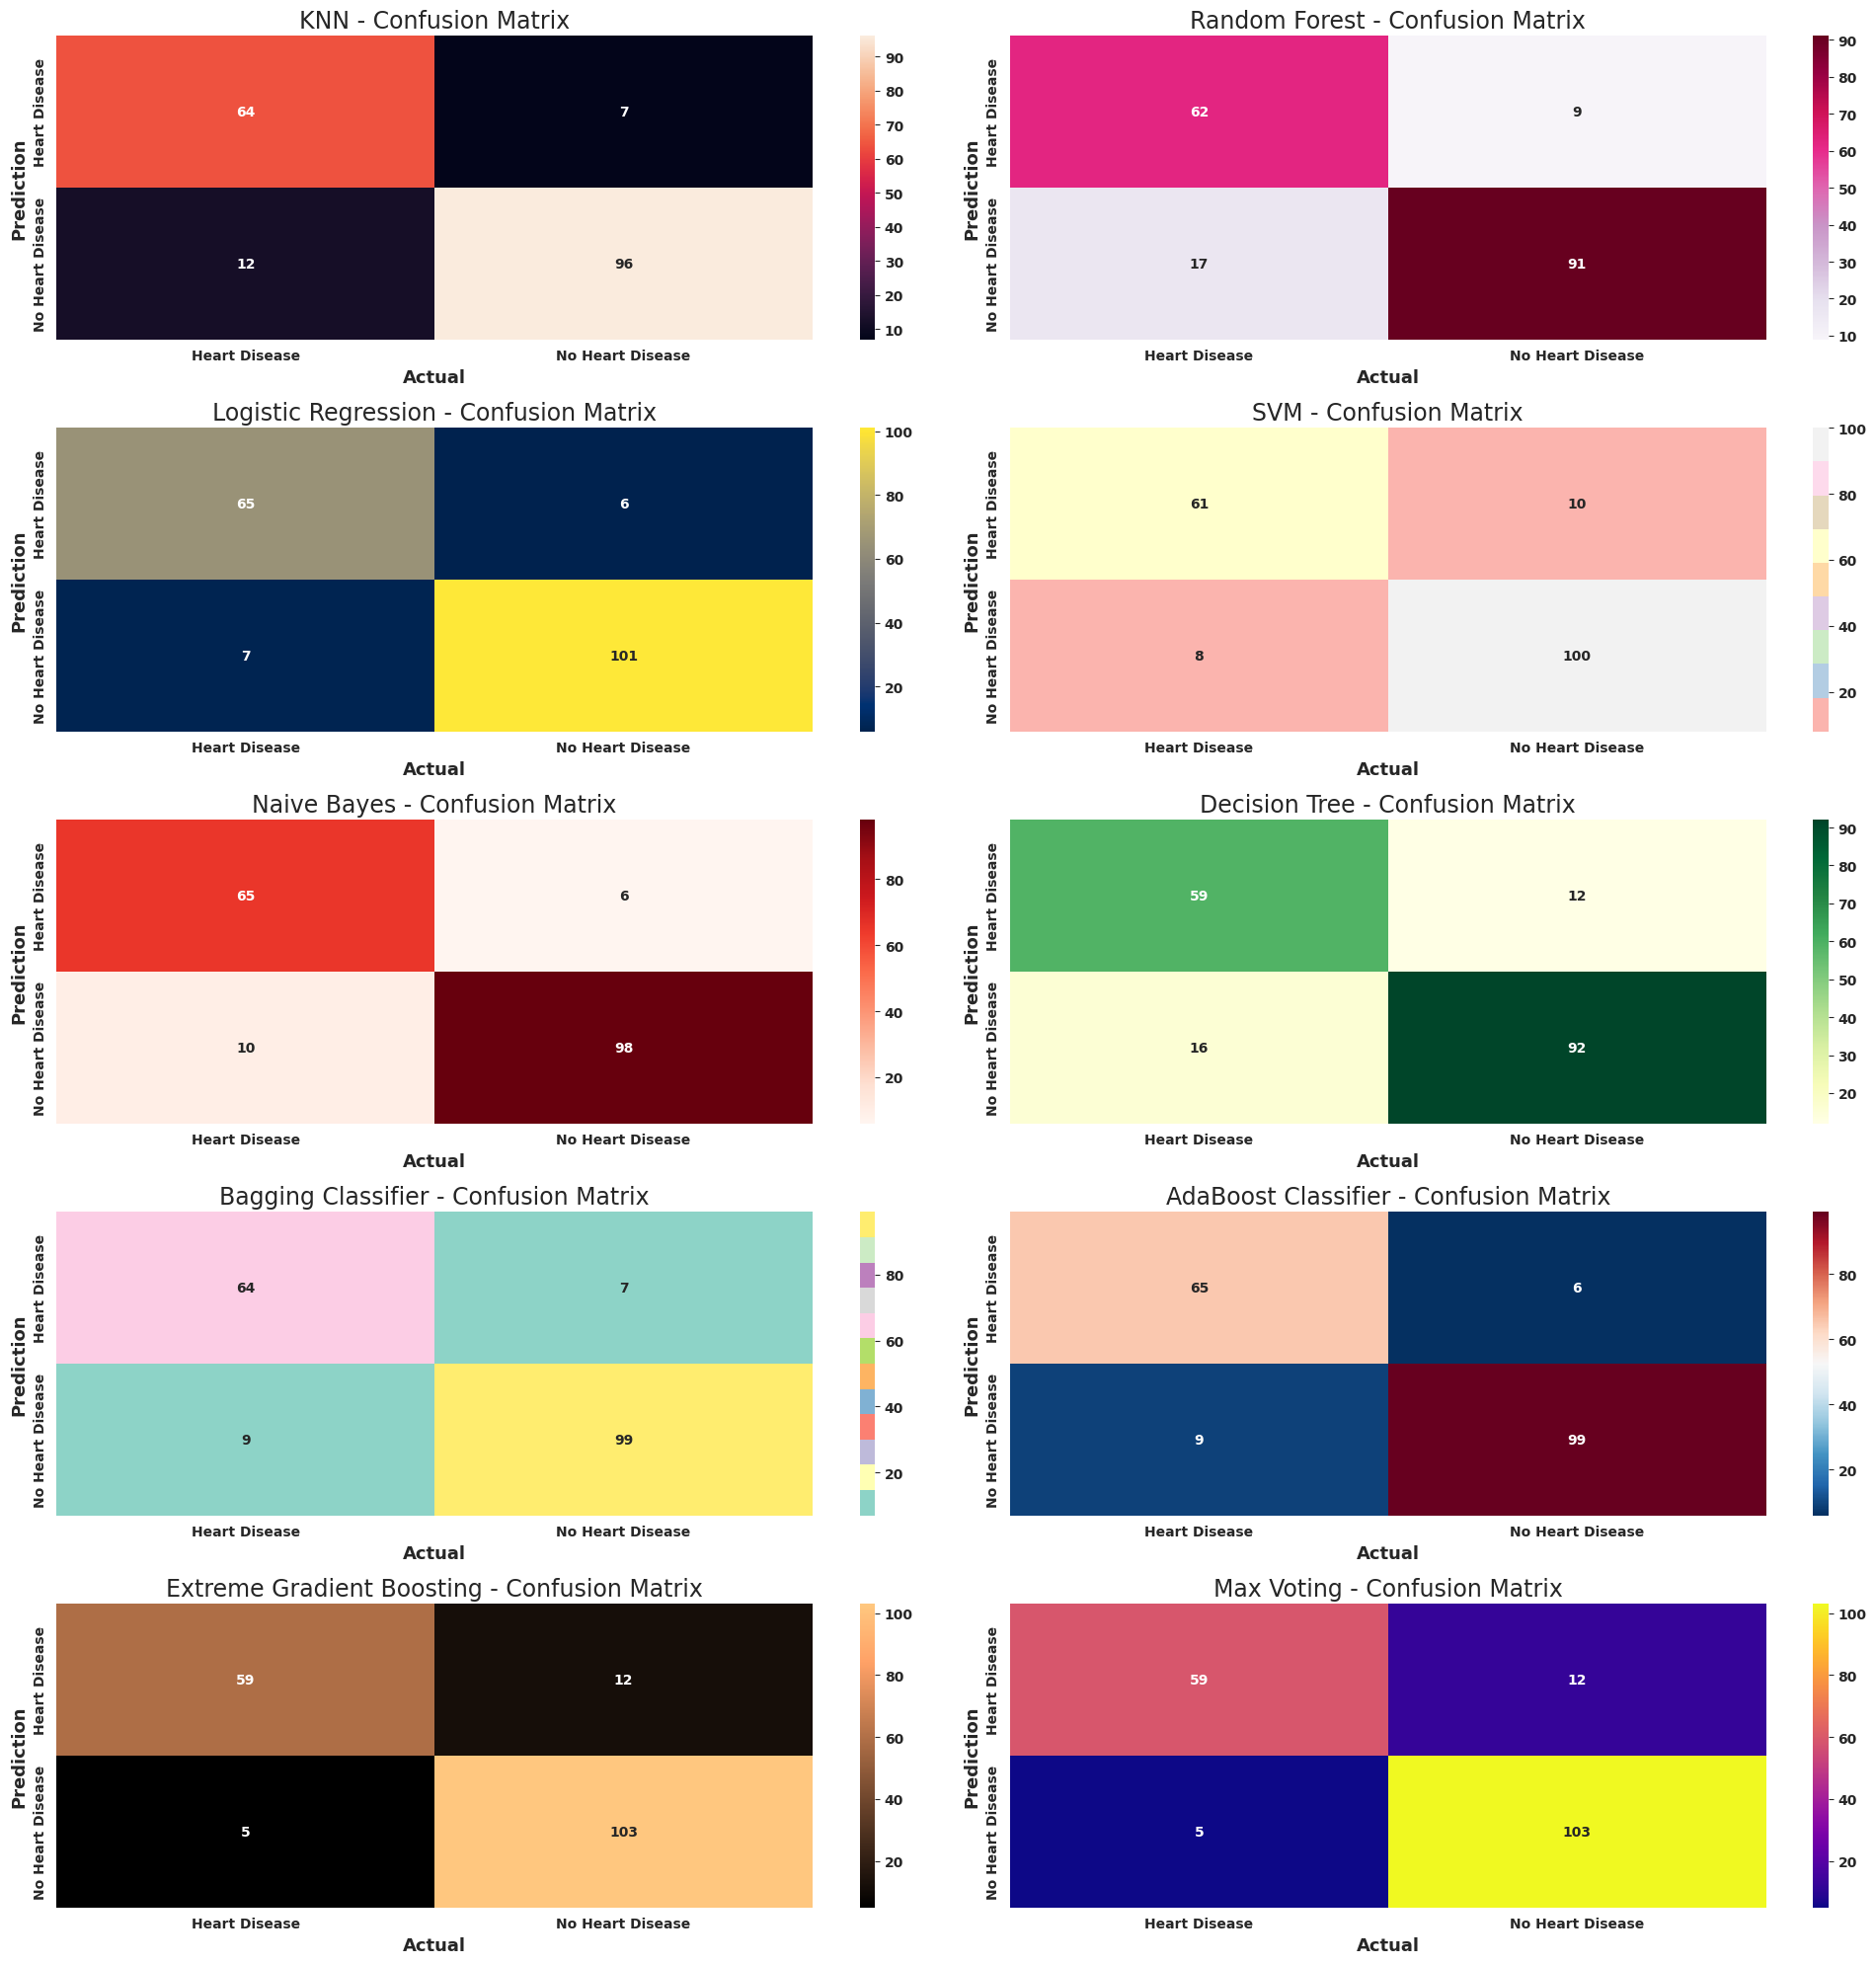

In [59]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 1)
sns.heatmap(confusion_matrix(Y_test,Y_pred_knn),
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('KNN - Confusion Matrix',fontsize=17)


plt.subplot(5, 2, 2)
sns.heatmap(confusion_matrix(Y_test,Y_pred_rfc),cmap="PuRd",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 3)
sns.heatmap(confusion_matrix(Y_test,Y_pred_lr), cmap="cividis",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Logistic Regression - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 4)
sns.heatmap(confusion_matrix(Y_test,Y_pred_svm),cmap="Pastel1",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SVM - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 5)
sns.heatmap(confusion_matrix(Y_test,Y_pred_gnb), cmap='Reds',
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Naive Bayes - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 6)
sns.heatmap(confusion_matrix(Y_test,Y_pred_dtc),cmap="YlGn",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Decision Tree - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 7)
sns.heatmap(confusion_matrix(Y_test,Y_pred_bag), cmap="Set3",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Bagging Classifier - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 8)
sns.heatmap(confusion_matrix(Y_test,Y_pred_abc),cmap="RdBu_r",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('AdaBoost Classifier - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 9)
sns.heatmap(confusion_matrix(Y_test,Y_pred_xgbc),cmap="copper",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Extreme Gradient Boosting - Confusion Matrix',fontsize=17)

plt.subplot(5, 2, 10)
sns.heatmap(confusion_matrix(Y_test,Y_pred_xgbc),cmap="plasma",
            annot=True,
            fmt='g',
            xticklabels=['Heart Disease','No Heart Disease'],
            yticklabels=['Heart Disease','No Heart Disease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Max Voting - Confusion Matrix',fontsize=17)

plt.tight_layout()

### ML ALGORITHM COMPARISION TABLE

In [60]:

df = pd.DataFrame({
    'Model Name': ['KNN', 'RandomForest', 'LR','SVM','Naive Bayes','DecisionTree','Bagging','AdaBoost','XGBoost','MaxVoting'],
    'True Negative': [confusion_matrix(Y_test, Y_pred_knn).ravel()[0], confusion_matrix(Y_test, Y_pred_rfc).ravel()[0], confusion_matrix(Y_test, Y_pred_lr).ravel()[0], confusion_matrix(Y_test, Y_pred_svm).ravel()[0], confusion_matrix(Y_test, Y_pred_gnb).ravel()[0], confusion_matrix(Y_test, Y_pred_dtc).ravel()[0],confusion_matrix(Y_test, Y_pred_bag).ravel()[0], confusion_matrix(Y_test, Y_pred_abc).ravel()[0], confusion_matrix(Y_test, Y_pred_xgbc).ravel()[0],confusion_matrix(Y_test, Y_pred_mv).ravel()[0]],
    'False Positive': [confusion_matrix(Y_test, Y_pred_knn).ravel()[1], confusion_matrix(Y_test, Y_pred_rfc).ravel()[1], confusion_matrix(Y_test, Y_pred_lr).ravel()[1], confusion_matrix(Y_test, Y_pred_svm).ravel()[1], confusion_matrix(Y_test, Y_pred_gnb).ravel()[1], confusion_matrix(Y_test, Y_pred_dtc).ravel()[1],confusion_matrix(Y_test, Y_pred_bag).ravel()[1], confusion_matrix(Y_test, Y_pred_abc).ravel()[1], confusion_matrix(Y_test, Y_pred_xgbc).ravel()[1],confusion_matrix(Y_test, Y_pred_mv).ravel()[1]],
    'False Negative': [confusion_matrix(Y_test, Y_pred_knn).ravel()[2], confusion_matrix(Y_test, Y_pred_rfc).ravel()[2], confusion_matrix(Y_test, Y_pred_lr).ravel()[2], confusion_matrix(Y_test, Y_pred_svm).ravel()[2], confusion_matrix(Y_test, Y_pred_gnb).ravel()[2], confusion_matrix(Y_test, Y_pred_dtc).ravel()[2],confusion_matrix(Y_test, Y_pred_bag).ravel()[2], confusion_matrix(Y_test, Y_pred_abc).ravel()[2], confusion_matrix(Y_test, Y_pred_xgbc).ravel()[2],confusion_matrix(Y_test, Y_pred_mv).ravel()[2]],
    'True Positive': [confusion_matrix(Y_test, Y_pred_knn).ravel()[3], confusion_matrix(Y_test, Y_pred_rfc).ravel()[3], confusion_matrix(Y_test, Y_pred_lr).ravel()[3], confusion_matrix(Y_test, Y_pred_svm).ravel()[3], confusion_matrix(Y_test, Y_pred_gnb).ravel()[3], confusion_matrix(Y_test, Y_pred_dtc).ravel()[3],confusion_matrix(Y_test, Y_pred_bag).ravel()[3], confusion_matrix(Y_test, Y_pred_abc).ravel()[3], confusion_matrix(Y_test, Y_pred_xgbc).ravel()[3],confusion_matrix(Y_test, Y_pred_mv).ravel()[3]],
    'Accuracy Score': [accuracy_score(Y_test, Y_pred_knn), accuracy_score(Y_test, Y_pred_rfc), accuracy_score(Y_test, Y_pred_lr), accuracy_score(Y_test, Y_pred_svm), accuracy_score(Y_test, Y_pred_gnb), accuracy_score(Y_test, Y_pred_dtc),accuracy_score(Y_test, Y_pred_bag), accuracy_score(Y_test, Y_pred_abc), accuracy_score(Y_test, Y_pred_xgbc), accuracy_score(Y_test, Y_pred_mv)],
    'F1 Score': [f1_score(Y_test, Y_pred_knn), f1_score(Y_test, Y_pred_rfc), f1_score(Y_test, Y_pred_lr), f1_score(Y_test, Y_pred_svm), f1_score(Y_test, Y_pred_gnb), f1_score(Y_test, Y_pred_dtc), f1_score(Y_test, Y_pred_bag), f1_score(Y_test, Y_pred_abc).ravel()[0], f1_score(Y_test, Y_pred_xgbc), f1_score(Y_test,Y_pred_mv)]
})
df_sorted = df.sort_values(by='Accuracy Score', ascending=False)
df_sorted

,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
2,LR,65,6,7,101,0.927374,0.939535
7,AdaBoost,65,6,9,99,0.916201,0.929577
9,MaxVoting,63,8,7,101,0.916201,0.930876
4,Naive Bayes,65,6,10,98,0.910615,0.924528
6,Bagging,64,7,9,99,0.910615,0.925234
8,XGBoost,59,12,5,103,0.905028,0.923767
3,SVM,61,10,8,100,0.899441,0.917431
0,KNN,64,7,12,96,0.893855,0.909953
1,RandomForest,62,9,17,91,0.854749,0.875000
5,DecisionTree,59,12,16,92,0.843575,0.867925


Logistic Regression has the highest accuracy.

In [61]:
pickle.dump(logre, open('logremodel.pkl', 'wb'))

### FEATURE IMPORTANCE

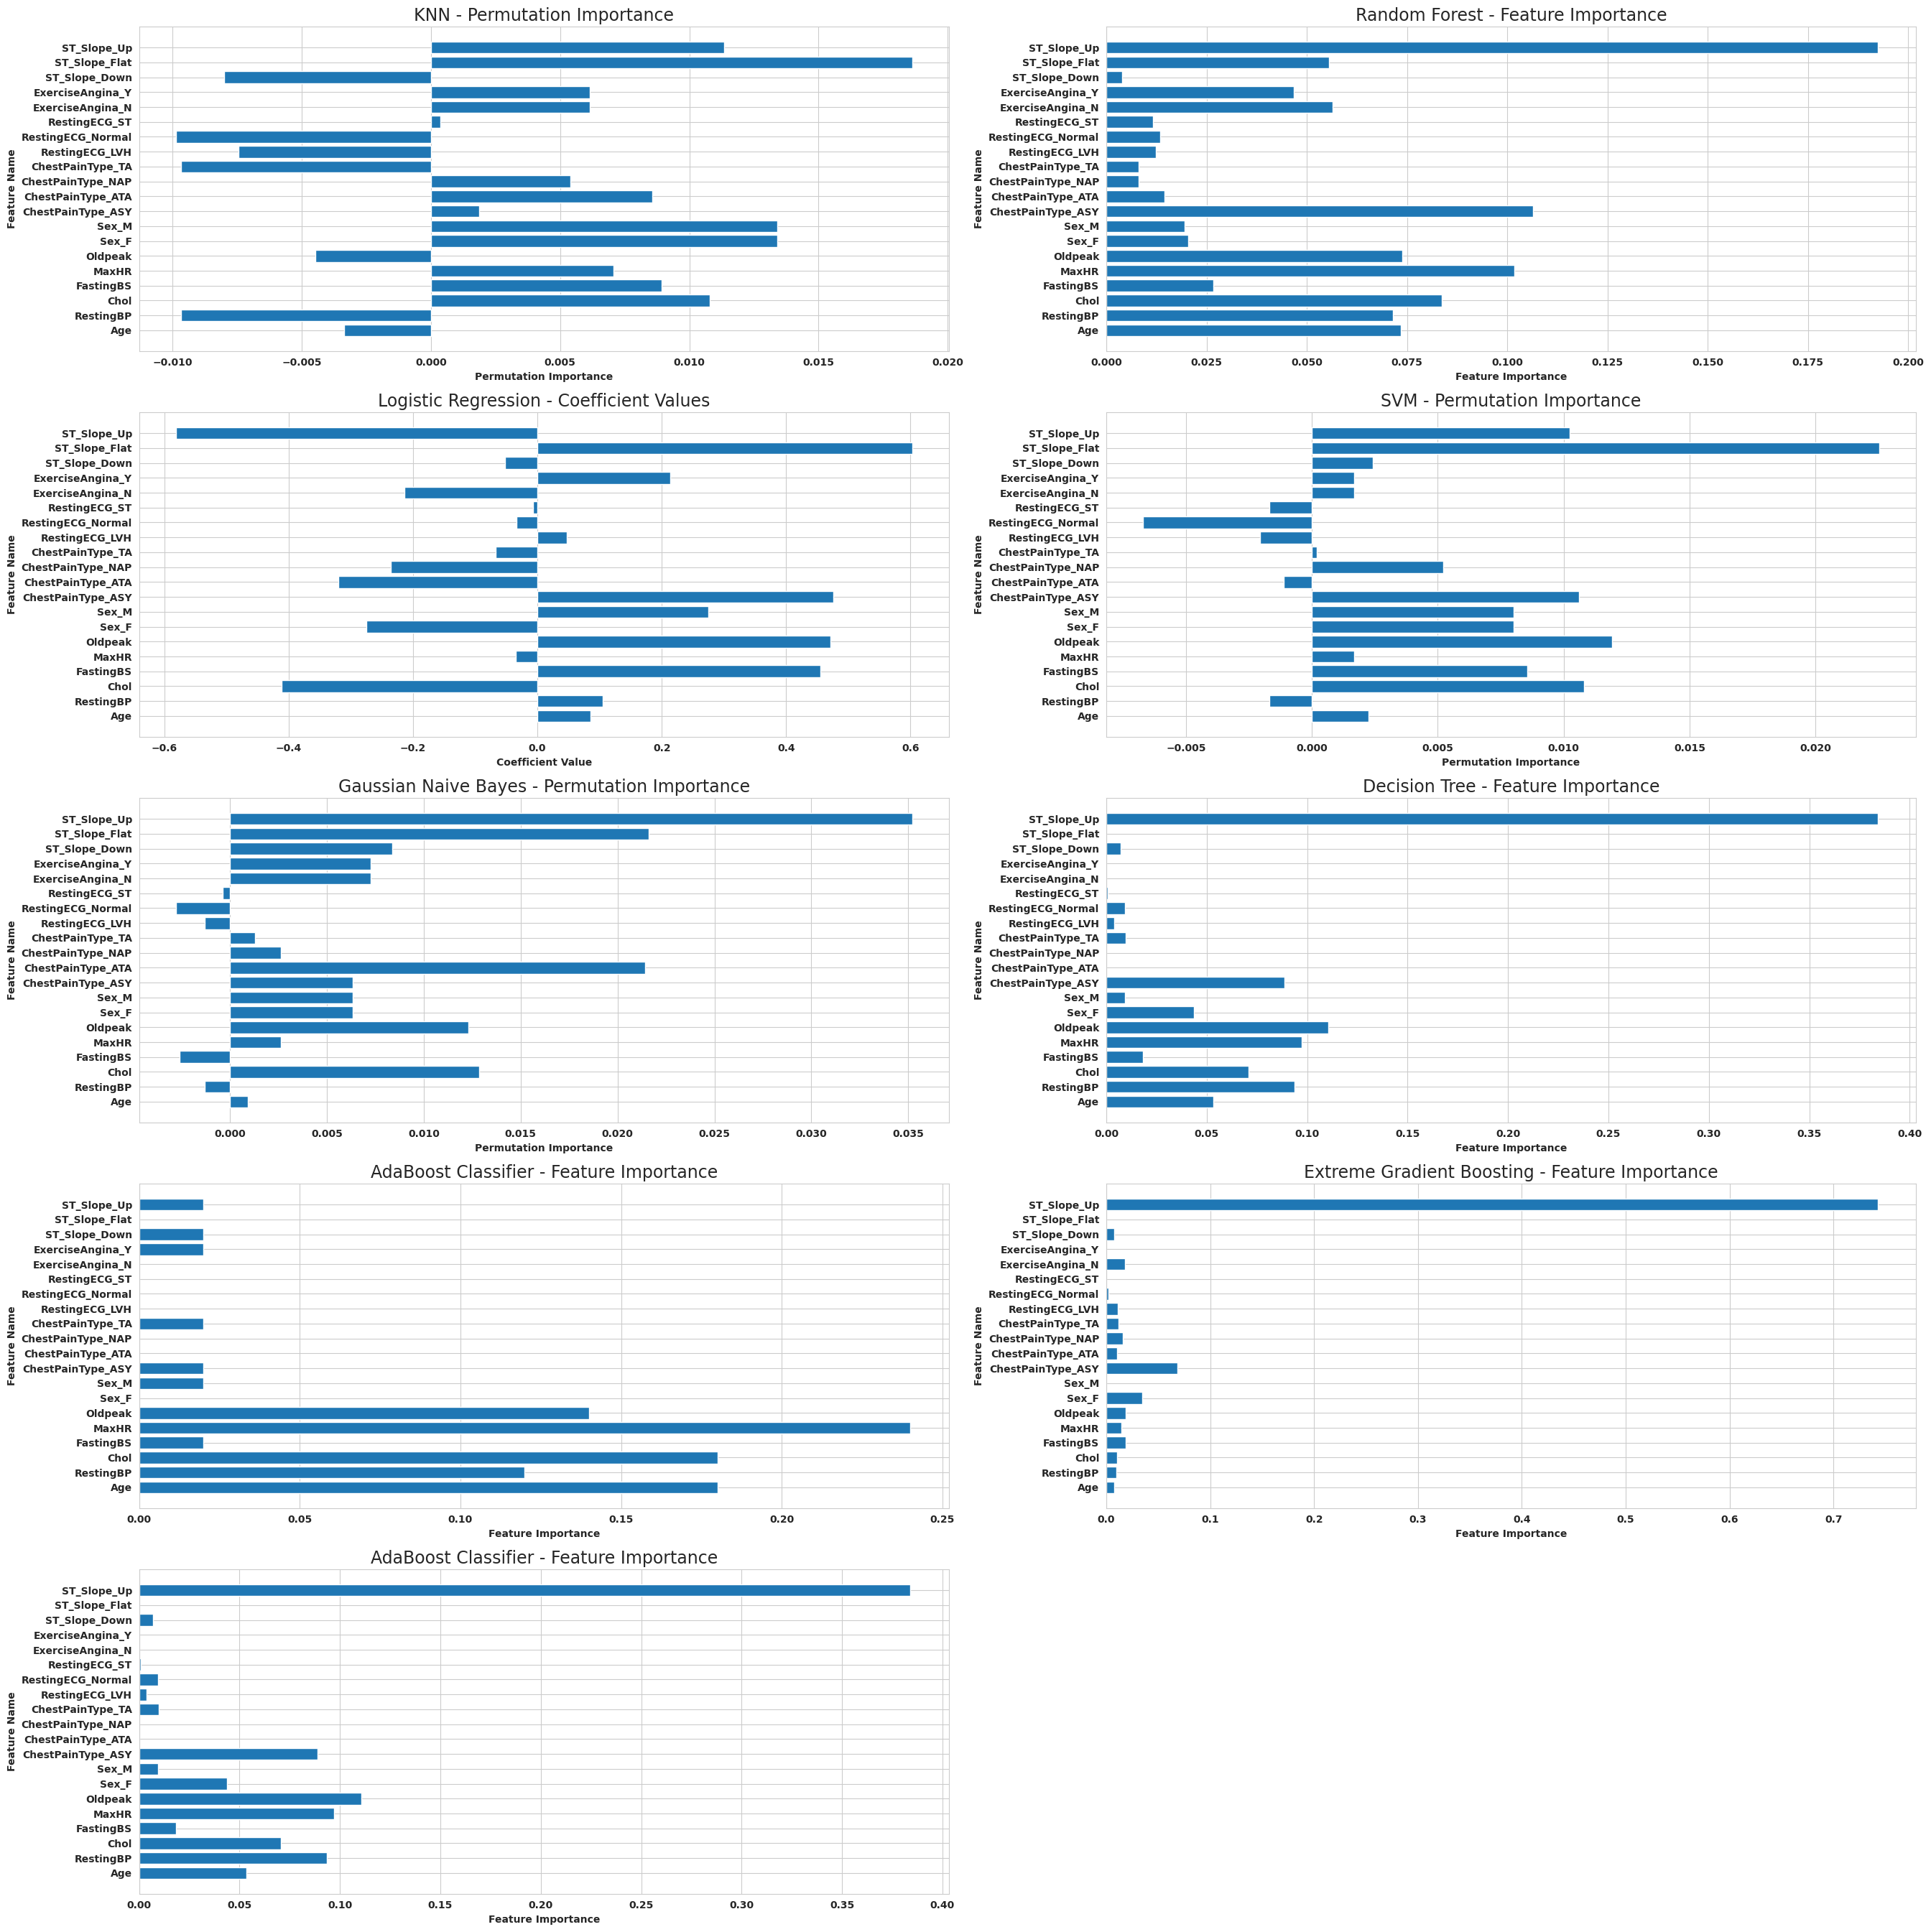

In [62]:
plt.figure(figsize=(27, 27))

plt.subplot(5, 2, 1)
perm_importance1 = permutation_importance(knn_classifier, X_test_scaled, Y_test, n_repeats=30, random_state=0)
plt.barh(X.columns, perm_importance1.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Name')
plt.title('KNN - Permutation Importance', fontsize=17)


plt.subplot(5, 2, 2)
plt.barh(X.columns, randomforest_classifier.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest - Feature Importance',fontsize=17)

plt.subplot(5, 2, 3)
plt.barh(X.columns, logre.coef_[0])  
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Logistic Regression - Coefficient Values', fontsize=17)

plt.subplot(5, 2, 4)
perm_importance2 = permutation_importance(svm, X_test_scaled, Y_test, n_repeats=30, random_state=0)
plt.barh(X.columns, perm_importance2.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Name')
plt.title('SVM - Permutation Importance', fontsize=17)

plt.subplot(5, 2, 5)
perm_importance = permutation_importance(gnb, X_test_scaled, Y_test, n_repeats=30, random_state=0)
plt.barh(X.columns, perm_importance.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Name')
plt.title('Gaussian Naive Bayes - Permutation Importance', fontsize=17)

plt.subplot(5, 2, 6)
plt.barh(X.columns, dtc.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Decision Tree - Feature Importance',fontsize=17)

plt.subplot(5, 2, 7)
plt.barh(X.columns, abc.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('AdaBoost Classifier - Feature Importance',fontsize=17)

plt.subplot(5, 2, 8)
plt.barh(X.columns, xgbc.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Extreme Gradient Boosting - Feature Importance',fontsize=17)

plt.subplot(5, 2, 9)
plt.barh(X.columns, bag.base_estimator.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('AdaBoost Classifier - Feature Importance',fontsize=17)


plt.tight_layout()


## Step 10: Testing the Model

- Take user input and predict the output

In [63]:
input_data = (37,0,135,140,207,0,0,130,1,15,0,1,2,1,0,10,10,2,1,0)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)

In [64]:
prediction = logre.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print( 'The person does not have a heart disease')
else:
    print('The person has a heart disease')

[1]
The person has a heart disease
